In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = np.load('/Users/rishabhtiwari/Documents/Uni Heidelberg/Academic Year Erasmus/Semester 1/Artificial Neural Network and Deep Learning/Practical/ANN-DL-Competition1/public_data.npz', allow_pickle=True)
# Assuming the dataset has two arrays 'X' for features and 'y' for labels
X = data['data']  # Assuming this is your feature data
y = data['labels']  # Assuming this is your label data

In [3]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (5200, 96, 96, 3)
Shape of y: (5200,)


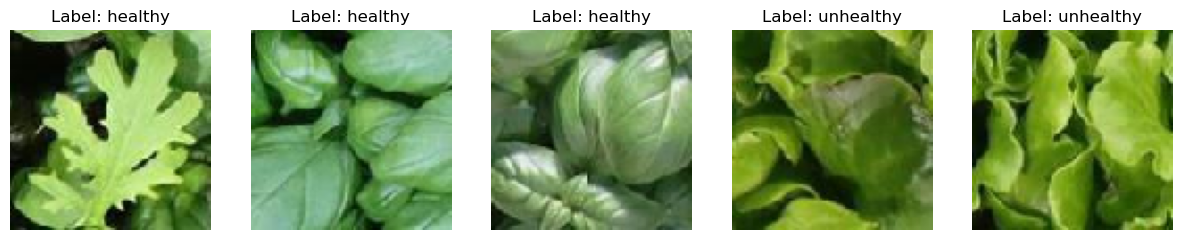

In [8]:
# Check if scaling is needed
if X.max() > 1.0:
    X = X.astype('float32') / 255.0

# Now, the images should be properly scaled. Let's try displaying them again.
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i])
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


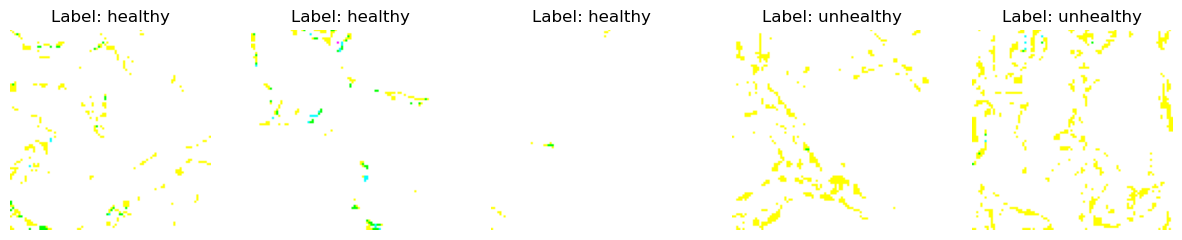

In [5]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i])
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

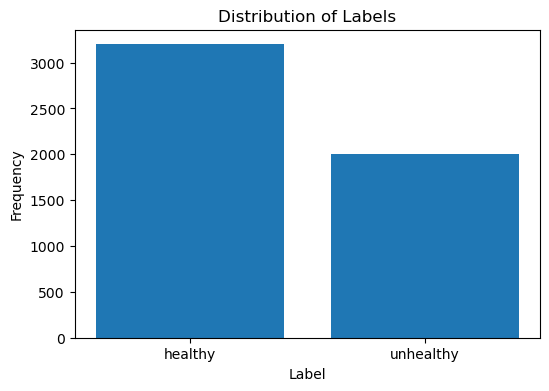

In [6]:
plt.figure(figsize=(6, 4))
plt.hist(y, bins=np.arange(-0.5, 2, 1), rwidth=0.8)
plt.title("Distribution of Labels")
plt.xticks([0, 1])
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

In [7]:
# Basic Statistical Analysis on Pixel Values
mean_pixel_values = X.mean(axis=(0, 1, 2))
std_pixel_values = X.std(axis=(0, 1, 2))
print(f"Mean pixel values (RGB): {mean_pixel_values}")
print(f"Standard deviation of pixel values (RGB): {std_pixel_values}")

Mean pixel values (RGB): [78.07676  89.62188  55.919914]
Standard deviation of pixel values (RGB): [48.433975 59.548073 46.32168 ]


In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array, array_to_img

# Load pre-trained VGG16 model without the classification layers
model = VGG16(include_top=False, input_shape=(96, 96, 3), weights='imagenet')

# Preprocess images and get feature vectors
def extract_features(images):
    features = []
    for image in images:
        # Resize image to 96x96 if not already
        if image.shape != (96, 96, 3):
            image = array_to_img(image)
            image = image.resize((96, 96))
            image = img_to_array(image)
        # Preprocess the image for the VGG16 model
        image = preprocess_input(image)
        # Get features
        feature = model.predict(image.reshape(1, 96, 96, 3))
        # Flatten the features
        features.append(feature.flatten())
    return np.array(features)

# Extract features from the images
X_features = extract_features(X)

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


In [10]:
# Apply PCA to reduce the dimensionality before t-SNE
pca = PCA(n_components=50)  # Reduce to 50 dimensions
X_pca = pca.fit_transform(X_features)

# Apply t-SNE to further reduce to 2 dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_pca)

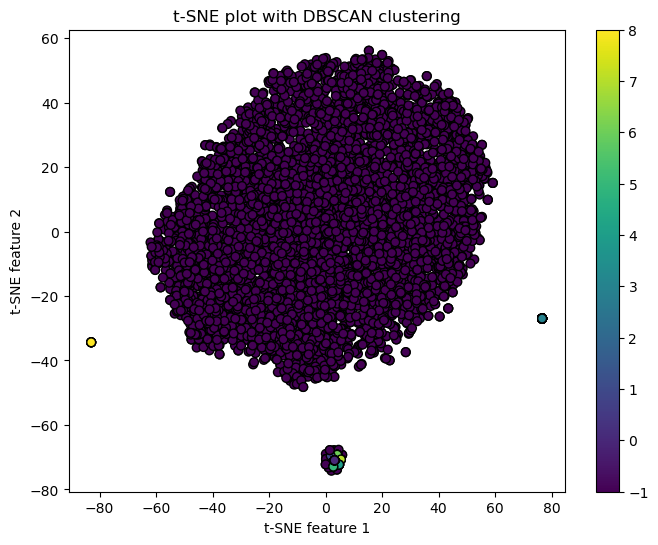

In [11]:
# Apply DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_tsne)

# Plot t-SNE reduced features with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=40)
plt.title("t-SNE plot with DBSCAN clustering")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


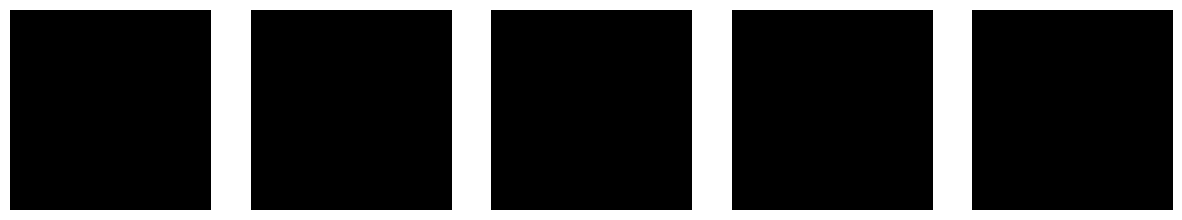

In [12]:
# Find outlier clusters or those that don't represent plants
# This requires some manual inspection after plotting
# For example, if cluster -1 is outliers
outlier_images = X[clusters == -1]
non_outlier_images = X[clusters != -1]

# If manual inspection is needed
# Display some of the outlier images for verification
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(non_outlier_images[i])
    ax.axis('off')
plt.show()

# Separate the outlier images based on your inspection
# You might need to iterate the eps and min_samples parameters of DBSCAN
# as well as the number of components for PCA and t-SNE to get a good separation.

In [13]:
# Let's say you want to remove outliers from X and y
X_clean = X[clusters != -1]
y_clean = y[clusters != -1]

# Now, X_clean and y_clean contain only the plant images and their labels


In [14]:
import os
from PIL import Image
import numpy as np

def is_image_file_corrupted(filepath):
    try:
        img = Image.open(filepath)  # Open the image file
        img.verify()  # Verify that it is, in fact, an image
        return False
    except (IOError, SyntaxError) as e:
        return True

In [16]:
import numpy as np
from PIL import Image
from io import BytesIO

# Function to check if an image (numpy array) is corrupted
def is_image_corrupted(image):
    try:
        # Convert the numpy array to a PIL Image and then to bytes
        img = Image.fromarray(image)
        b = BytesIO()
        img.save(b, format='png')  # Save image to bytes, you can choose another format if you like
        img = Image.open(b)  # Try to open the image from bytes
        img.verify()  # Verify that it is, in fact, an image
        return False
    except Exception as e:  # Catch all exceptions, as PIL can raise different types of exceptions
        return True

# Assuming X is your array of images
corrupted_indices = [i for i in range(len(X)) if is_image_corrupted(X[i])]
X_clean = np.delete(X, corrupted_indices, axis=0)  # Remove corrupted images
y_clean = np.delete(y, corrupted_indices)  # Remove corresponding labels